In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
nums=np.arange(7)+3
nums2=np.arange(6)+3

dims=np.loadtxt('questruntime/dim.dat')
sruntimes=np.loadtxt('questruntime/sruntime.dat')
cruntimes=np.loadtxt('questruntime/cruntime.dat')
eruntimes=np.loadtxt('questruntime/eruntimes.dat')
pruntimes=np.loadtxt('questruntime/pruntime.dat')


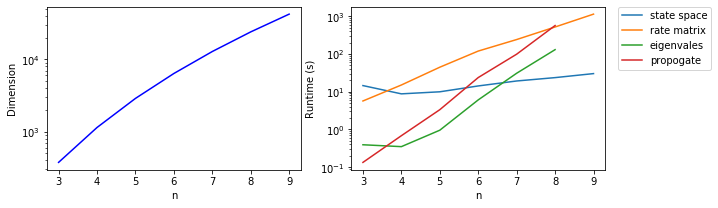

In [4]:
plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.semilogy(nums,dims, 'b-')
plt.xlabel("n")
plt.ylabel("Dimension")
plt.subplot(122)
plt.semilogy(nums,sruntimes, label="state space")
plt.semilogy(nums,cruntimes, label="rate matrix")
plt.semilogy(nums2,eruntimes, label="eigenvales")
plt.semilogy(nums2,pruntimes, label="propogate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("n")
plt.ylabel("Runtime (s)")
plt.show()

In [16]:
a,b=np.polyfit(nums,np.log(cruntimes),1)
print([np.exp(b+a*n)/3600 for n in range(16)])
print((np.log(60*60*24)-b)/a)

[0.00013221507135280852, 0.00031926452787209796, 0.0007709396342978143, 0.0018616158947960299, 0.004495311416844934, 0.01085499151081889, 0.026211941681818004, 0.06329492621401381, 0.15284055386161655, 0.3690696285155577, 0.8912058171153965, 2.152027008168838, 5.196577664717443, 12.548364552551918, 30.300990979666793, 73.1689018520847]
13.735561238908279


In [29]:
filebase="data/h2o2/5/"
propogate=np.load(filebase+"propogate.npy")
temperatures=np.load(filebase+"temperatures.npy")
pressures=np.load(filebase+"pressures.npy")
times=np.load(filebase+"times.npy")
multiindices=np.load(filebase+"multiindices.npy")
spatoms=np.load(filebase+"spatoms.npy")

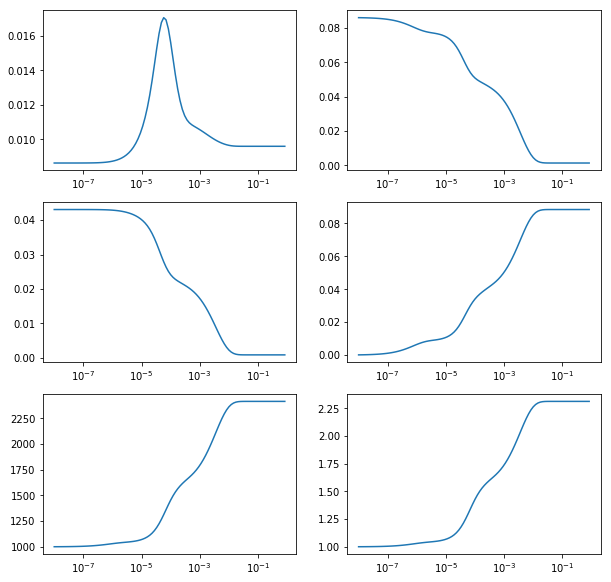

In [30]:
plt.figure(figsize=(10, 10))
plt.subplot(321)

plt.semilogx(times,np.sum(propogate.dot(np.diag((multiindices[:,1]+multiindices[:,2]+multiindices[:,4]+multiindices[:,6])/np.sum(multiindices,axis=1))),axis=1))
plt.subplot(322)
plt.semilogx(times,np.sum(propogate.dot(np.diag(multiindices[:,0]/np.sum(multiindices,axis=1))),axis=1))
plt.subplot(323)
plt.semilogx(times,np.sum(propogate.dot(np.diag(multiindices[:,3]/np.sum(multiindices,axis=1))),axis=1))
plt.subplot(324)
plt.semilogx(times,np.sum(propogate.dot(np.diag(multiindices[:,5])/np.sum(multiindices,axis=1)),axis=1))
plt.subplot(325)
plt.semilogx(times,np.sum(propogate.dot(np.diag(temperatures)),axis=1))
plt.subplot(326)
plt.semilogx(times,np.sum(propogate.dot(np.diag(pressures)),axis=1))